# 3: Word2Vec api service

We are using Google News group Pretrained Model:

In [17]:
#########################################################################################################################

In [2]:
import requests
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

### Loading Data file consisting of all word pair

In [3]:
data=pd.read_csv('combined.csv')
data.head(5)

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62


### Making request to api service to calculate similarity

In [12]:
score=list()
for i in range(len(data)):
    w1=data.iloc[i][0]
    w2=data.iloc[i][1]
    r  = requests.get("http://127.0.0.1:5000/word2vec/similarity?w1="+w1+"&w2="+w2)
    score.append([w1,w2,float(r.text)])

In [13]:
word2vec=pd.DataFrame(score,columns=['w1','w2','word2vec_score'])
word2vec.head(5)

,w1,w2,word2vec_score
0,love,sex,0.263938
1,tiger,cat,0.517296
2,tiger,tiger,1.000000
3,book,paper,0.363463
4,computer,keyboard,0.396392


### Plots

In [19]:
s=word2vec['word2vec_score'][:len(word2vec)]


# normalizing between 0 to 10
s=(s-np.min(s))*10/(np.max(s)-np.min(s))


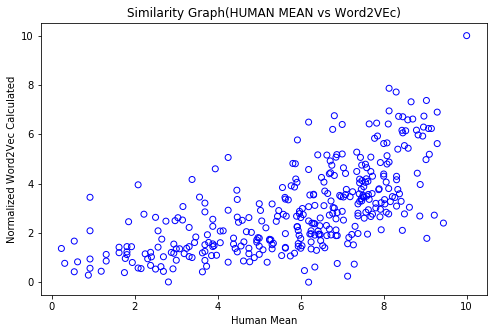

In [22]:
fig,ax=plt.subplots(figsize=(8,5))
ax.scatter(data['Human (mean)'][:len(data)],s,facecolor='none',edgecolor='b')
ax.set_ylabel("Normalized Word2Vec Calculated")
ax.set_xlabel("Human Mean")
ax.set_title("Similarity Graph(HUMAN MEAN vs Word2VEc)")
# ax.plot(np.linspace(0,10,5),np.linspace(0,10,5),color='green',linestyle='--')
plt.savefig('word2vec.png',bbox='tight')
plt.show()